In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(11)

In [2]:
X1 = 3*np.random.rand(100,1)           #generate 100 random data points - single feature
y = 5 + 4*X1 + np.random.randn(100,1)  #values with errors having mean=0 and unit variance as from normal dist.

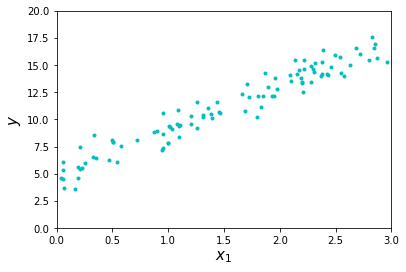

In [3]:
plt.plot(X1,y,"c.")
plt.xlabel("$x_1$",fontsize=15)
plt.ylabel("$y$",fontsize=15)
plt.axis([0,3,0,20])
plt.show()

In [4]:
#direct solution from Normal Equation

X0_X1 = np.c_[np.ones((100,1)),X1] #include model intercept for each instance
theta = np.linalg.inv(X0_X1.T.dot(X0_X1)).dot(X0_X1.T).dot(y)

In [5]:
print("model intercept: ",theta[0])
print("x1 parameter:    ",theta[1])

model intercept:  [ 4.95599156]
x1 parameter:     [ 4.06200008]


In [6]:
X_fringe = np.array([[0],[3]])
X0_X1_fringe = np.c_[np.ones((2,1)),X_fringe]
y_fringe = X0_X1_fringe.dot(theta)

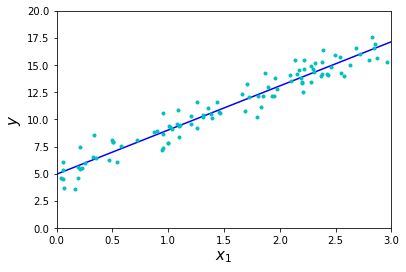

In [7]:
plt.plot(X_fringe,y_fringe,"b-")
plt.plot(X1,y,"c.")
plt.xlabel("$x_1$",fontsize=15)
plt.ylabel("$y$",fontsize=15)
plt.axis([0,3,0,20])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
print("sklearn B0: ", lr.intercept_)
print("sklearn B1: ", lr.coef_[0])

sklearn B0:  [ 4.95599156]
sklearn B1:  [ 4.06200008]


In [10]:
adj_rate = 0.1
iterations = 1000
n = 100
theta = np.random.randn(2,1)       #randomly generate X0,X1

for iteration in range(iterations):
    gradients = 2/n * X0_X1.T.dot(X0_X1.dot(theta) - y)
    theta = theta - adj_rate*gradients

In [11]:
print("model intercept: ",theta[0])
print("x1 parameter:    ",theta[1])

model intercept:  [ 4.95599156]
x1 parameter:     [ 4.06200008]


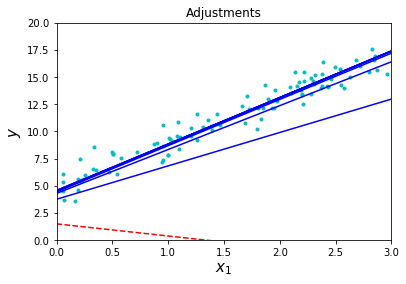

In [14]:
theta = np.random.randn(2,1)
plt.plot(X1,y,"c.")

for iteration in range(10):
    y_pred = X0_X1_fringe.dot(theta)    #y_fringe
    style="b-" if iteration >0 else "r--"
    plt.plot(X_fringe,y_pred,style)
    gradients = 2/n * X0_X1.T.dot(X0_X1.dot(theta) - y)
    theta = theta - adj_rate*gradients
    
plt.xlabel("$x_1$",fontsize=15)
plt.ylabel("$y$",fontsize=15)
plt.title("Adjustments")
plt.axis([0,3,0,20])
plt.show()